## Seasonal variation of sales of Drink1 (300ml) and Drink2 (500ml) throughout all of years 2021~2023
---
#### Research Questions:
- How are the sales distributed?

  - What are the descriptive statistics?

    - What is the mean, median, mode?

    - What is the standard deviation?
    
  - What are the Q1 and Q3 values? 
  
    - How does the distribution of data for sales look for IQR values?  

<br>

- Is there any correlation between the sales of both the drinks? 

  - What is the correlation for the sales per month between the drink and with each other?

<br>

- Which company code sold more? Which sold less? Finding the top 25% and bottom 25%.

- Which month/week/day had the most sales? (Through normalization & calendar chart)

- Which month had the most sales within the IQR

- What are the peak seasons for these sales (within IQR)

---

#### Research Purpose:  
- To get an insight into how sales were different throughout days and months of the last 3 years through seasonal basis as well 
- How the sales of one drink affect the other. 

(For getting insight and some clues to what the data says can help in marketing strategies or perhaps show an underlying pattern in sales)

---
The dataset is then divided on a yearly basis for both the drinks to create the training dataset and testing dataset for an ML model to predict sales with a 70% accuracy.


We will first start by importing the neccessary libraries needed for the research.

In [1]:
#Importing necessary libraries

import pandas as pd                                 #for utilizing dataframes
import seaborn as sb                                #for making statistical graphs
import matplotlib.pyplot as plt                     #for plotting graphs
from statsmodels.tsa.arima.model import ARIMA       #for using time series
from statsmodels.tsa.stattools import adfuller      #for checking if data is stationary or not
from pmdarima import auto_arima                     #for finding the best fit order for ARIMA model
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats import chisquare, lognorm

We will now proceed to load the dataset. 
Since we're given a csv file, we're going to use the read_csv function from pandas.

In [2]:
drink1_file  = 'File path to Drink1'      #file path to data file for drink1
drink2_file = 'File path to Drink2'       #file path to data file for drink2
drink1 = pd.read_csv(drink1_file)         #loading file of drink1
drink2 = pd.read_csv(drink2_file)         #loading file of drink2

The next step is to appropriately clean the data and also look into how the data is distributed.

       MAX(A.JAN_CODE)  SUM(A.QUANTITY)  SUM(A.AMOUNT_OF_MONEY)
count     1.866658e+06     1.866658e+06            1.866658e+06
mean      4.902102e+12     5.430298e+00            4.150756e+02
std       0.000000e+00     1.230643e+01            9.261424e+02
min       4.902102e+12     0.000000e+00           -1.800000e+03
25%       4.902102e+12     1.000000e+00            8.800000e+01
50%       4.902102e+12     3.000000e+00            2.040000e+02
75%       4.902102e+12     6.000000e+00            4.500000e+02
max       4.902102e+12     4.173000e+03            3.129750e+05
Mode: 0    1.0
Name: SUM(A.QUANTITY), dtype: float64


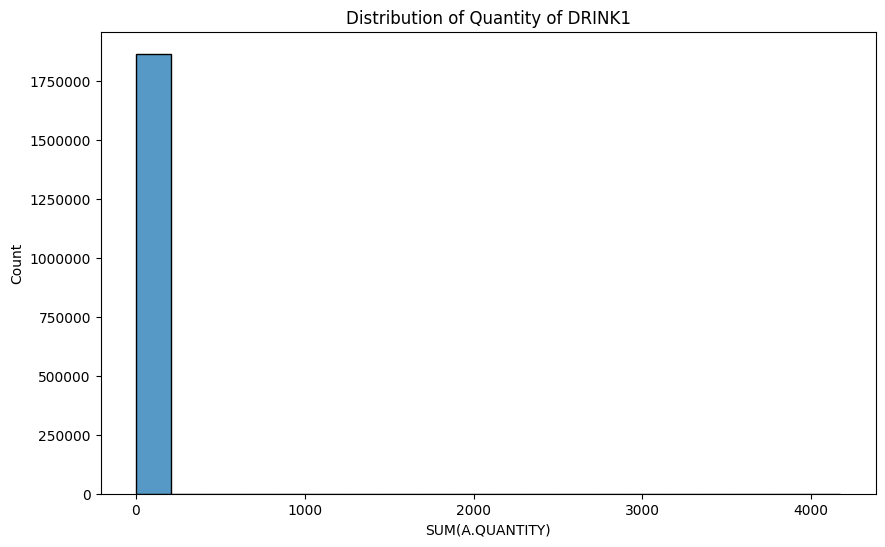

       SUM(A.QUANTITY)
count       731.000000
mean      13866.634747
std        3795.737425
min        2259.000000
25%       11248.500000
50%       14090.000000
75%       16248.500000
max       28381.000000
Mode: 0      8785.0
1     10060.0
2     10436.0
3     10720.0
4     11282.0
5     11809.0
6     11982.0
7     11996.0
8     12720.0
9     13615.0
10    13854.0
11    13993.0
12    14143.0
13    14210.0
14    14314.0
15    14566.0
16    14675.0
17    14949.0
18    15439.0
19    15508.0
20    15928.0
21    16005.0
22    16514.0
Name: SUM(A.QUANTITY), dtype: float64


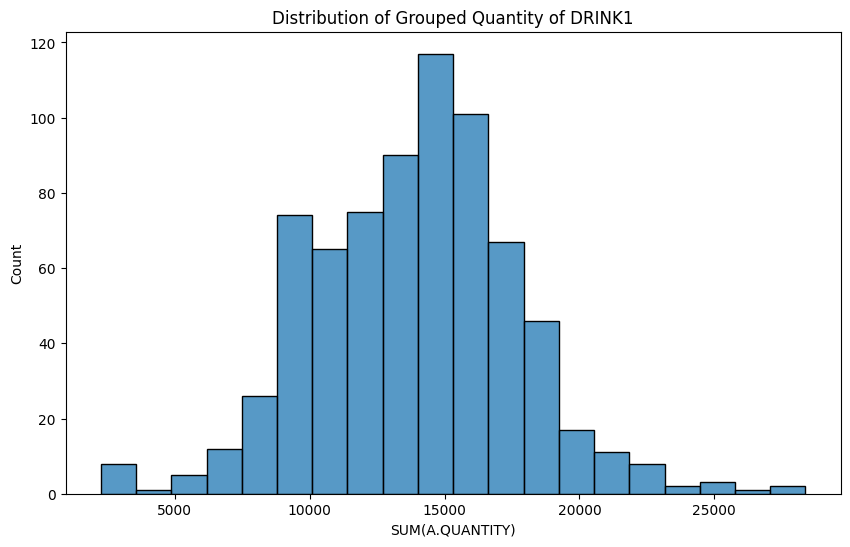

In [3]:
#Cleaning & Ordering data for Drink1

#Checking missing values through data wrangler
drink1

#Adjusting df to have +ve sales values
drink1 = drink1[drink1["SUM(A.QUANTITY)"]>=0]
print(drink1.describe())
print("Mode:", drink1["SUM(A.QUANTITY)"].mode())

#Graphing out all data in a histogram
plt.figure(figsize=(10, 6))
sb.histplot(drink1['SUM(A.QUANTITY)'], bins=20)
plt.title('Distribution of Quantity of DRINK1')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

#Grouping the data by summing the quantities
drink1_grouped = drink1.groupby("DATE")["SUM(A.QUANTITY)"].sum().reset_index()
print(drink1_grouped.describe())
print("Mode:", drink1_grouped["SUM(A.QUANTITY)"].mode())

#Graphing out grouped data in a histogram
plt.figure(figsize=(10, 6))
sb.histplot(drink1_grouped['SUM(A.QUANTITY)'], bins=20)
plt.title('Distribution of Grouped Quantity of DRINK1')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

**Findings:**

For the original data:
- Mean = 5.4

- Median = 3.0

- Mode = 1.0

- SD = 12.3

We can see from the numbers (mean!=median!=mode!) and the graph that the distribution of sales for drink1 is not normal and is highly skewed.

For the grouped data:
- Mean = 13866.63

- Median = 14090.00

- Mode = multiple

- SD = 3795.73

However, we can see from the grouped distribution of the sales that the distribution is somewhat normal.

       MAX(A.JAN_CODE)  SUM(A.QUANTITY)  SUM(A.AMOUNT_OF_MONEY)
count     1.560543e+07     1.560543e+07            1.560543e+07
mean      4.902102e+12     1.334130e+01            1.057825e+03
std       3.320313e-02     6.018980e+01            4.318238e+03
min       4.902102e+12     0.000000e+00           -2.424000e+03
25%       4.902102e+12     3.000000e+00            2.080000e+02
50%       4.902102e+12     6.000000e+00            4.900000e+02
75%       4.902102e+12     1.300000e+01            1.092000e+03
max       4.902102e+12     3.137400e+04            1.272537e+06
Mode: 0    2.0
Name: SUM(A.QUANTITY), dtype: float64


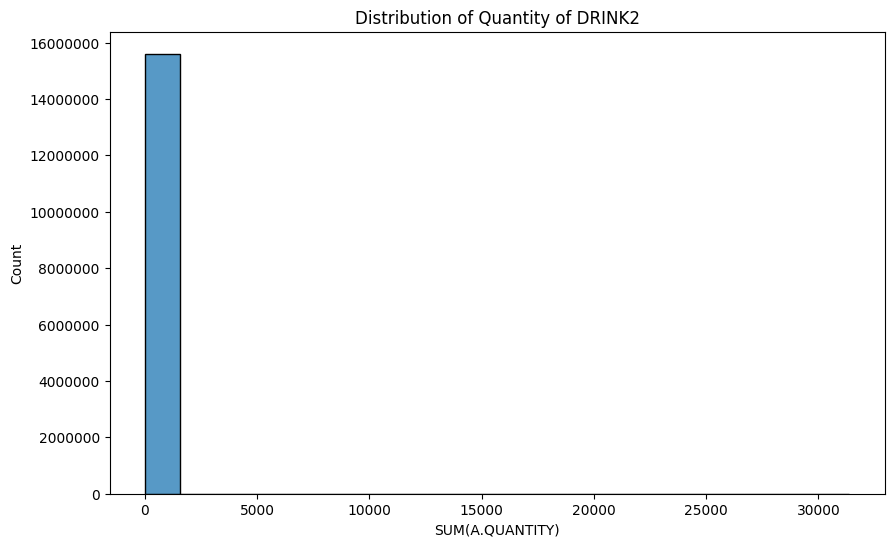

       SUM(A.QUANTITY)
count     7.310000e+02
mean      2.848109e+05
std       1.839929e+05
min       5.197800e+04
25%       1.605770e+05
50%       2.302410e+05
75%       3.500930e+05
max       1.269529e+06
Mode: 0        51978.0
1        53713.0
2        59677.0
3        60928.0
4        69403.0
         ...    
726    1001916.0
727    1040381.0
728    1093136.0
729    1192455.0
730    1269529.0
Name: SUM(A.QUANTITY), Length: 731, dtype: float64


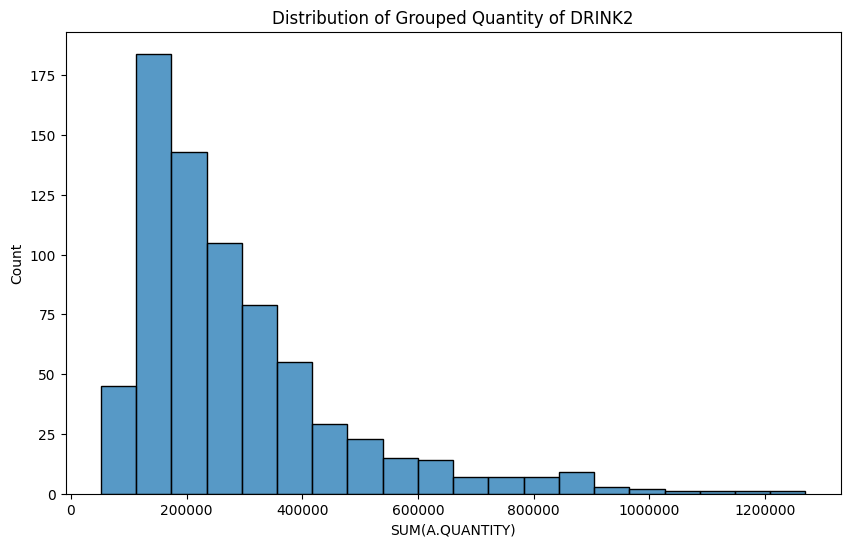

In [4]:
#Cleaning & Ordering data for Drink2

#Checking missing values through data wrangler
drink2

#Adjusting df to have +ve sales values
drink2 = drink2[drink2["SUM(A.QUANTITY)"]>=0]
print(drink2.describe())
print("Mode:", drink2["SUM(A.QUANTITY)"].mode())

#Graphing out all data in a histogram
plt.figure(figsize=(10, 6))
sb.histplot(drink2['SUM(A.QUANTITY)'], bins=20)
plt.title('Distribution of Quantity of DRINK2')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

#Grouping the data by summing the quantities
drink2_grouped = drink2.groupby("DATE")["SUM(A.QUANTITY)"].sum().reset_index()
print(drink2_grouped.describe())
print("Mode:", drink2_grouped["SUM(A.QUANTITY)"].mode())

#Graphing out grouped data in a histogram
plt.figure(figsize=(10, 6))
sb.histplot(drink2_grouped['SUM(A.QUANTITY)'], bins=20)
plt.title('Distribution of Grouped Quantity of DRINK2')
plt.ticklabel_format(axis='x', style='plain')
plt.show()

**Findings:**

For the original data:
- Mean = 13.3

- Median = 6.0

- Mode = 2.0

- SD = 60.2

We can see from the numbers (mean!=median!=mode!) and the graph that the distribution of sales for drink2 is not normal and is highly skewed as well.

For the grouped data:
- Mean = 284810.9

- Median = 230241.0

- Mode = multiple

- SD = 183992.9

We can see that even the grouped data's distribution is skewed and is definitely not normal. We can make the assumption that this is either a chi-squared distribution or a lognormal distribution. However, we will confirm these assumptions in the upcoming steps.

We initially see that the data for sales appear to have negative values as well. This could be due to error in data entry or maybe cancellation or return of these sales.
Hence, moving further, the dataset being used for both drinks will have all *positive* values for sales and will be the grouped dataframe since grouped data allows for enhanced interpretability and reduced noise

We now try looking into the correlation between both the drinks. Finding correlation between the sales of both the drinks and also seeing monthly correlation gives us insight on how the sales may be influenced by similar factors - such as marketing strategies, consumer preferences and behavior, seasonal promotions, targeted sales strategies based on month.

Correlation between sales of Drink1 and Drink2:  0.64


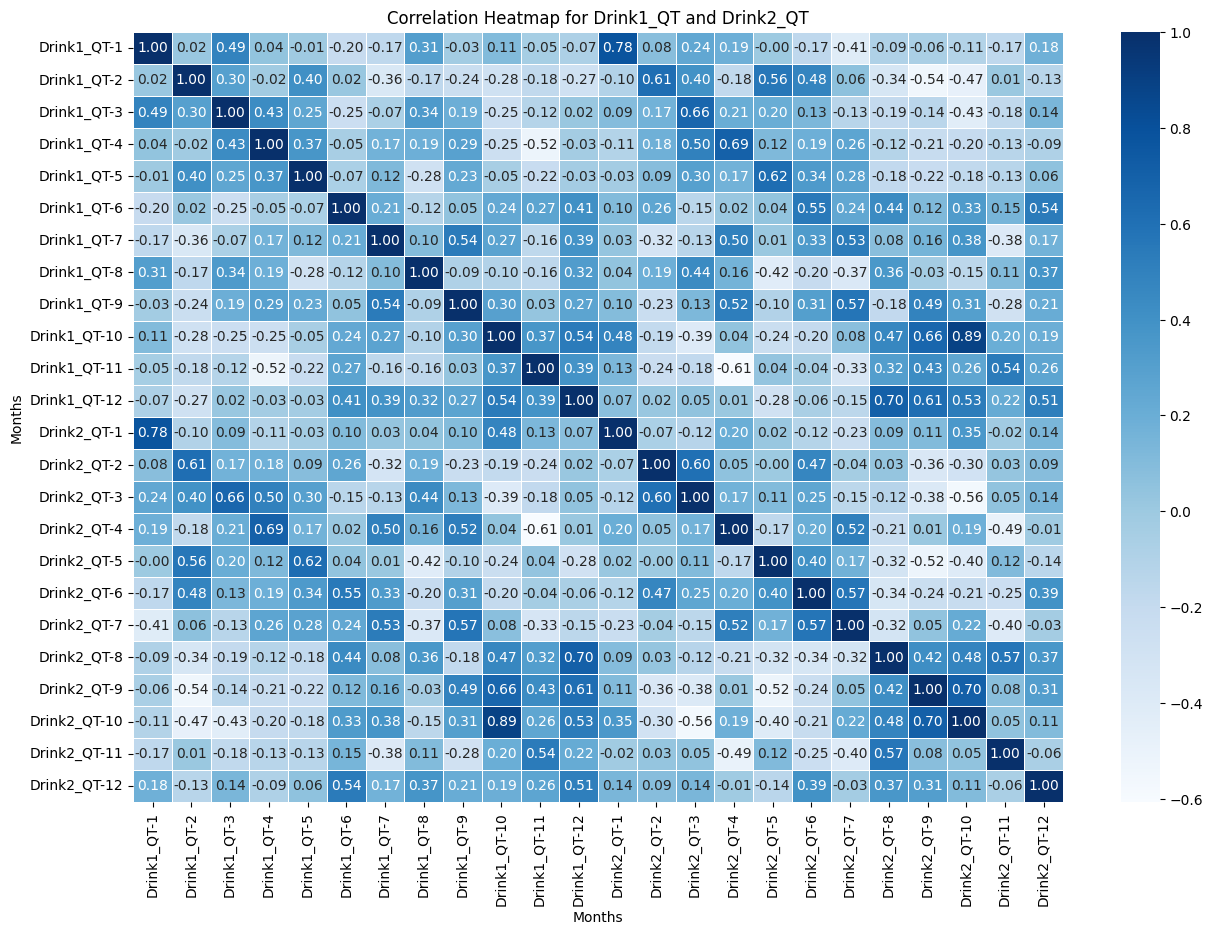

In [5]:
#Correlation between quanitity of sales of BOTH drinks

#Overall correlation
#Merging the data for both drinks based on their common dates
merged = pd.merge(drink1_grouped, drink2_grouped, on="DATE")

#renaming merged column names
merged = merged.rename(
    columns={"SUM(A.QUANTITY)_x": "Drink1_QT", "SUM(A.QUANTITY)_y": "Drink2_QT"}
)

correlation = merged["Drink1_QT"].corr(merged["Drink2_QT"])
print(f"Correlation between sales of Drink1 and Drink2: {correlation: .2f}")


# MONTHLY CORRELATION (HEATMAP)

merged["Month"] = pd.to_datetime(merged["DATE"]).dt.month
merged["Day"] = pd.to_datetime(merged["DATE"]).dt.day

monthly_correlate_df = merged.pivot_table(index="Day", columns="Month", values=['Drink1_QT', 'Drink2_QT'])

correlation_matrix = monthly_correlate_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sb.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Drink1_QT and Drink2_QT')
plt.xlabel("Months")
plt.ylabel("Months")
plt.show()

We can see that there is a high positive correlation of 0.64 between both drinks that suggest that as Drink1 sells more, Drink2 sells more as well. But of course this does not imply that *because* Drink1 sells more, Drink2 sells more. This just tells us the strength and direction of relationship between the sales of both the drinks.

We also found that there is a strong correlation of 0.89 between both drinks in October which leads us to wonder what caused this - maybe Halloween or some other related special promotion for the drinks could have contributed to this high correlation.

We now proceed to doing some analysis based on company code and sales. Finding what companies sold most/least and finding out what prefecture these sales occured in could help us question and further on look into how/why the sales were high/low.

In [36]:
#analysis based on company code

##Drink1
aggregated_drink1 = drink1.groupby('COMPANY_CODE')[['SUM(A.QUANTITY)','MAX(B.PREFECTURE)']].sum().reset_index() #groups by company_code, sums up the total quantities, resets the index of the df

#which company sold the most
sorted_val_drink1 = aggregated_drink1.sort_values(by='SUM(A.QUANTITY)')


top_sell_drink1 = sorted_val_drink1.iloc[-1]
low_sell_drink1 = sorted_val_drink1.iloc[0]

print("Code of company that made most sales for Drink1:", top_sell_drink1)
print("Code of company that made least sales for Drink1:", low_sell_drink1)

drink1_lower_25 = aggregated_drink1[aggregated_drink1["SUM(A.QUANTITY)"]<=aggregated_drink1["SUM(A.QUANTITY)"].quantile(0.25)]
print("All Drink1 sales in bottom 25%")
print(drink1_lower_25)  #gives all sales less than Q1 of aggregated

drink1_higher_75 = aggregated_drink1[aggregated_drink1["SUM(A.QUANTITY)"]>=aggregated_drink1["SUM(A.QUANTITY)"].quantile(0.75)]
print("All Drink1 sales in the top 25%")
print(drink1_higher_75)  #gives all sales more than Q3 of aggregated

##Drink2
aggregated_drink2 = drink2.groupby('COMPANY_CODE')[['SUM(A.QUANTITY)','MAX(B.PREFECTURE)']].sum().reset_index() #groups by company_code, sums up the total quantities, resets the index of the df

#which company sold the most
sorted_val_drink2 = aggregated_drink2.sort_values(by='SUM(A.QUANTITY)')


top_sell_drink2 = sorted_val_drink2.iloc[-1]
low_sell_drink2 = sorted_val_drink2.iloc[0]

print("Code of company that made most sales for Drink2:", top_sell_drink2)
print("Code of company that made least sales for Drink2:", low_sell_drink2)

drink2_lower_25 = aggregated_drink2[aggregated_drink2["SUM(A.QUANTITY)"]<=aggregated_drink2["SUM(A.QUANTITY)"].quantile(0.25)]
print("All Drink2 sales in bottom 25%")
print(drink2_lower_25)  #gives all sales less than Q1 of aggregated

drink2_higher_75 = aggregated_drink2[aggregated_drink2["SUM(A.QUANTITY)"]>=aggregated_drink2["SUM(A.QUANTITY)"].quantile(0.75)]
print("All Drink2 sales in the top 25%")
print(drink2_higher_75)  #gives all sales more than Q3 of aggregated

Code of company that made most sales for Drink1: COMPANY_CODE                                                   3148317
SUM(A.QUANTITY)                                               499158.0
MAX(B.PREFECTURE)    13_東京11_埼玉13_東京13_東京13_東京13_東京13_東京13_東京13_東京1...
Name: 79, dtype: object
Code of company that made least sales for Drink1: COMPANY_CODE                                     3403020
SUM(A.QUANTITY)                                      0.0
MAX(B.PREFECTURE)    27_大阪27_大阪27_大阪27_大阪27_大阪27_大阪27_大阪
Name: 217, dtype: object
All Drink1 sales in bottom 25%
    COMPANY_CODE  SUM(A.QUANTITY)  \
0          11040              2.0   
4      200210MAN              4.0   
10        301800             38.0   
13        304900            265.0   
19        310290             47.0   
..           ...              ...   
237       900083            209.0   
238     900087HR            122.0   
241     900087TH            193.0   
247     D3400146             42.0   
248     D3400403             5

**Findings:**

For Drink1:
- Company Code for most sales: 3148317 (499158 units)
- Company Code for least sales: 3403020 & 3150508 (0 units)

For Drink2:
- Company Code for most sales: 304700 (9821365 units)
- Company Code for least sales: 3122001HK (152 units)


Also found list of company codes that made top 25% and bottom 25% of the sales along with the prefectures these occured in. Due to time restrictions, further analysis could not be performed.

These findings could help us see if low sales or high sales are common in specific prefectures and as mentioned previously, could help in the investigation of potential reasons for such variation in sales.

Let's see which day in what month has the most sales throughout all years. We do this simply by normalizing the data to scale the huge quantities down, and then use the pivot_table function to plot a calendar chart as follows:

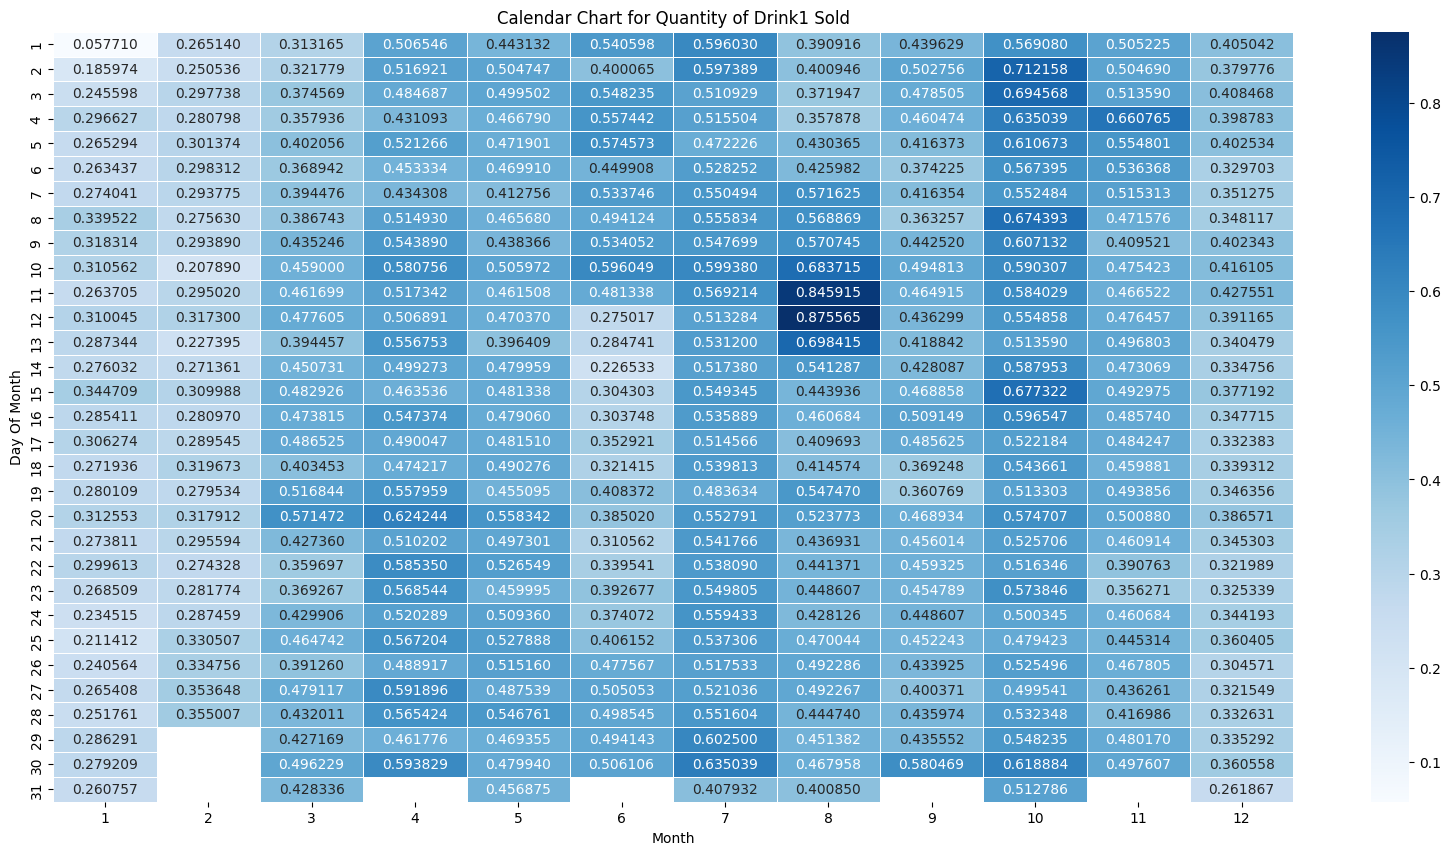

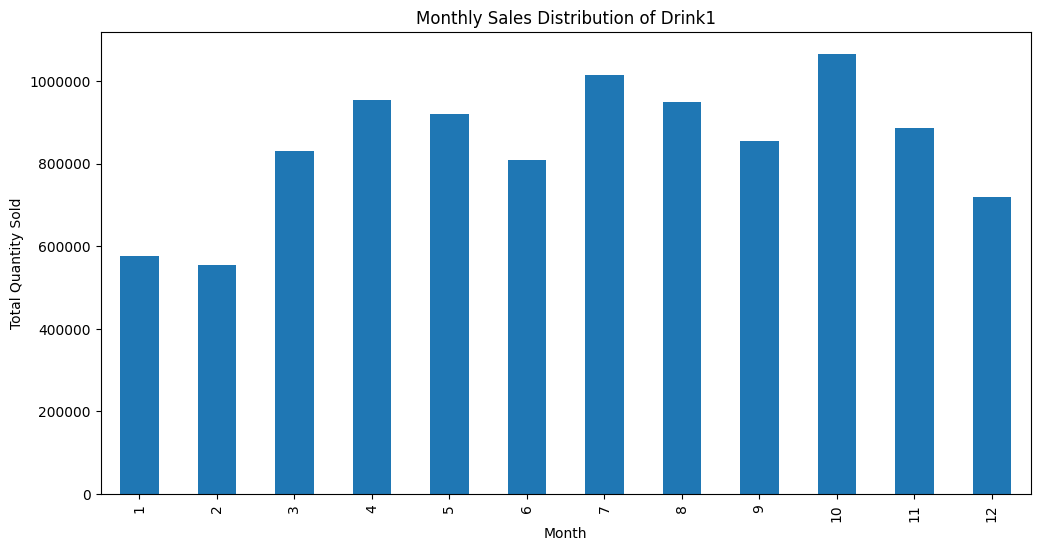

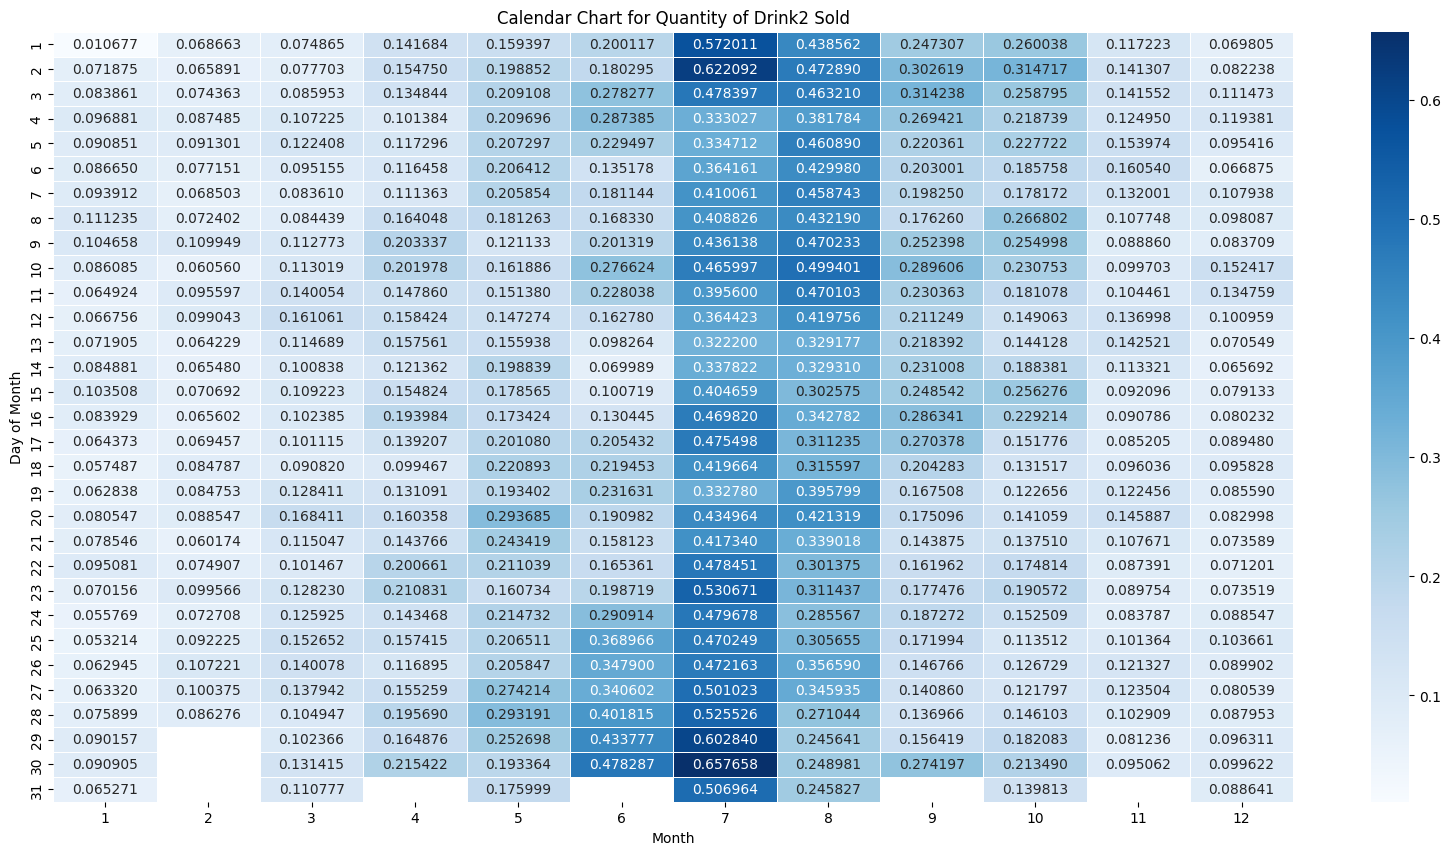

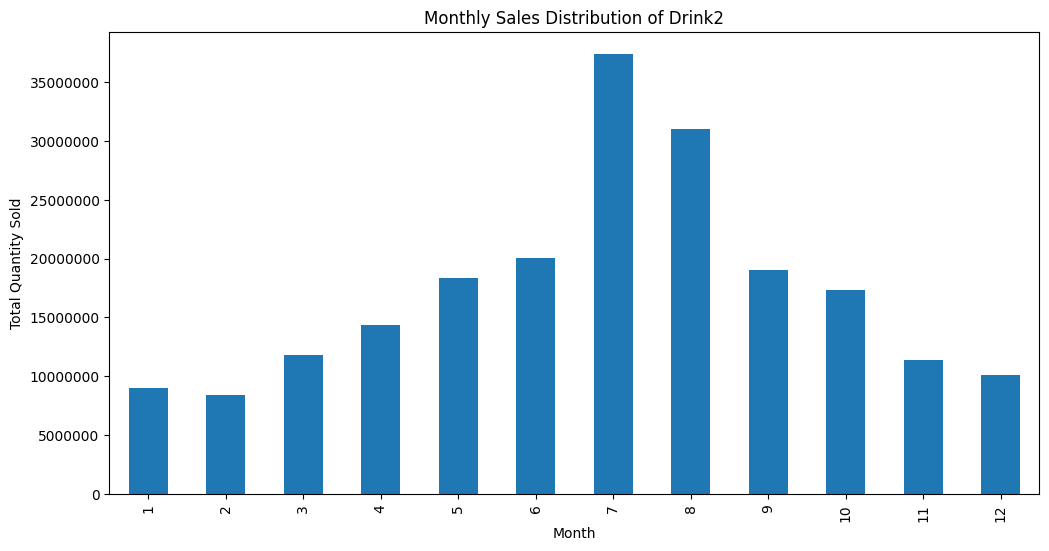

In [6]:
# normalize the data for quantity and then plot the calendar chart

##Drink1
drink1_grouped["normalized"] = (drink1_grouped["SUM(A.QUANTITY)"] - drink1_grouped["SUM(A.QUANTITY)"].min()) / (drink1_grouped["SUM(A.QUANTITY)"].max() - drink1_grouped["SUM(A.QUANTITY)"].min())

drink1_grouped["DATE"] = pd.to_datetime(drink1_grouped["DATE"])
drink1_grouped['Month'] = drink1_grouped['DATE'].dt.month
drink1_grouped["Day"] = drink1_grouped["DATE"].dt.day
peak_month_drink1 = drink1_grouped.groupby('Month')['SUM(A.QUANTITY)'].sum()

calendar_data_drink1 = drink1_grouped.pivot_table(values="normalized", index=drink1_grouped["DATE"].dt.day, columns=drink1_grouped["DATE"].dt.month, aggfunc="median")

#creating heatmap
plt.figure(figsize=(20, 10))
sb.heatmap(calendar_data_drink1, cmap="Blues", annot=True, fmt=".6f", linewidths=0.5)
plt.title("Calendar Chart for Quantity of Drink1 Sold")
plt.xlabel("Month")
plt.ylabel("Day Of Month")
plt.show()

#Plotting month-wise
plt.figure(figsize=(12, 6))
peak_month_drink1.plot(kind='bar')
plt.title('Monthly Sales Distribution of Drink1')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

##Drink2
drink2_grouped["normalized"] = (drink2_grouped["SUM(A.QUANTITY)"] - drink2_grouped["SUM(A.QUANTITY)"].min()) / (drink2_grouped["SUM(A.QUANTITY)"].max() - drink2_grouped["SUM(A.QUANTITY)"].min())

drink2_grouped["DATE"] = pd.to_datetime(drink2_grouped["DATE"])
drink2_grouped['Month'] = drink2_grouped['DATE'].dt.month
drink2_grouped["Day"] = drink2_grouped["DATE"].dt.day
peak_month_drink2 = drink2_grouped.groupby('Month')['SUM(A.QUANTITY)'].sum()

calendar_data_drink2 = drink2_grouped.pivot_table(values="normalized", index=drink2_grouped["DATE"].dt.day, columns=drink2_grouped["DATE"].dt.month, aggfunc="median")

#creating heatmap
plt.figure(figsize=(20, 10))
sb.heatmap(calendar_data_drink2, cmap="Blues", annot=True, fmt=".6f", linewidths=0.5)
plt.title("Calendar Chart for Quantity of Drink2 Sold")
plt.xlabel("Month")
plt.ylabel("Day of Month")
plt.show()

#Plotting month-wise
plt.figure(figsize=(12, 6))
peak_month_drink2.plot(kind='bar')
plt.title('Monthly Sales Distribution of Drink2')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

**Findings:**

For Drink1:
- Peak Month: October
- Peak Week: August 8-14
- Peak Day: 8/12

For Drink2:
- Peak Month: July
- Peak Week: July 25-31
- Peak Day: 7/30

Now that we have already seen the distribution of the sales of the drinks, let’s focus on the IQR (Inter-Quartile Range) of the data. 
<br>
When there are outliers in the data and the distribution of the data is not normal, we often resort to the IQR of the data. Although there may be a hint at a chi-squared or lognormal distribution for Drink2, let's see how the data distribution within this IQR looks like.

Let's proceed with manipulating our dataframes to have dataset from Q1~Q3 of the IQR.

In [7]:
#Manipulating the data to find iqr values

##Drink1
quantile_low_drink1 = drink1_grouped['SUM(A.QUANTITY)'].quantile(0.25)
quantile_high_drink1 = drink1_grouped['SUM(A.QUANTITY)'].quantile(0.75)

# print(quantile_low_drink1)
# print(quantile_high_drink1)

drink1_iqr = drink1_grouped[(drink1_grouped['SUM(A.QUANTITY)'] >= quantile_low_drink1) & (drink1_grouped['SUM(A.QUANTITY)'] <= quantile_high_drink1)]   #Drink1 data within the IQR value

##Drink2
quantile_low_drink2 = drink2_grouped['SUM(A.QUANTITY)'].quantile(0.25)
quantile_high_drink2 = drink2_grouped['SUM(A.QUANTITY)'].quantile(0.75)

# print(quantile_low_drink2)
# print(quantile_high_drink2)

drink2_iqr = drink2_grouped[(drink2_grouped['SUM(A.QUANTITY)'] >= quantile_low_drink2) & (drink2_grouped['SUM(A.QUANTITY)'] <= quantile_high_drink2)]   #Drink2 within the IQR value

**Findings:**

For Drink1:
- Q1 = 11248.5
- Q3 = 16248.5

For Drink2:
- Q1 = 160577.0
- Q3 = 350093.0

IQR = Q1~Q3

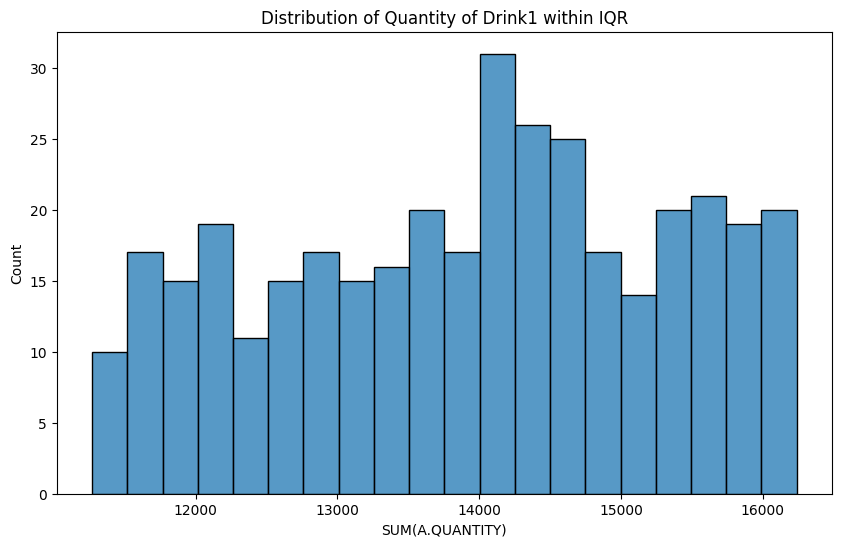

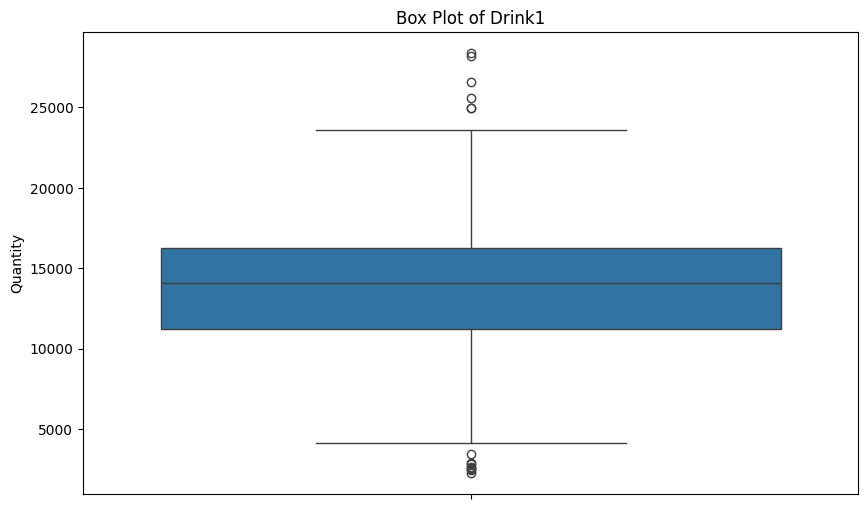

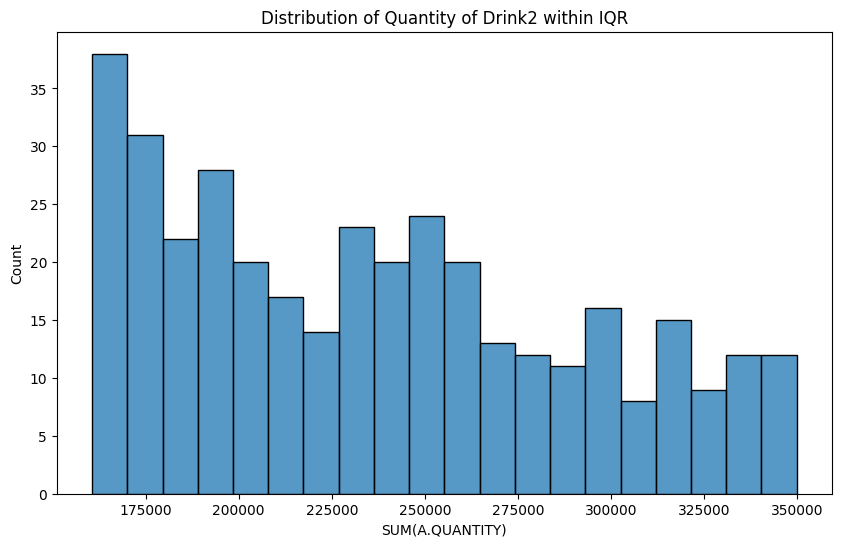

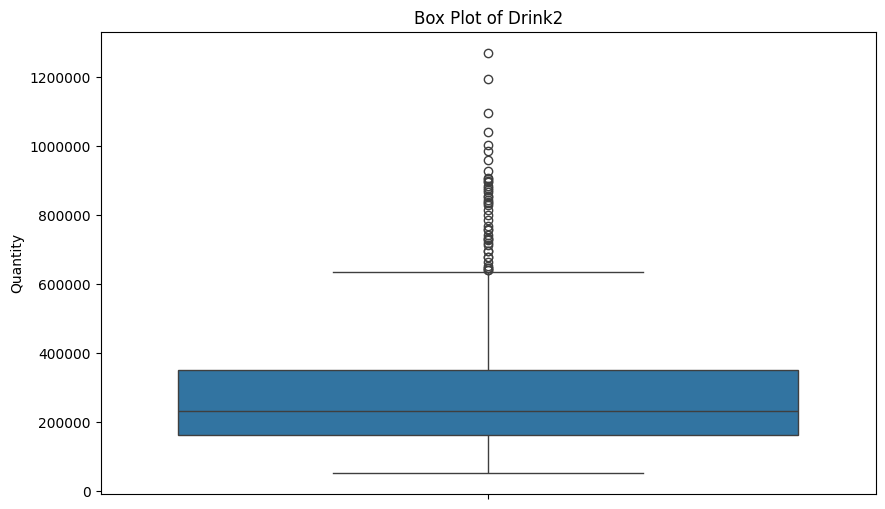

In [8]:
#Manipulating the data to find iqr values

##Drink1
quantile_low_drink1 = drink1_grouped['SUM(A.QUANTITY)'].quantile(0.25)
quantile_high_drink1 = drink1_grouped['SUM(A.QUANTITY)'].quantile(0.75)

# print(quantile_low_drink1)
# print(quantile_high_drink1)

drink1_iqr = drink1_grouped[(drink1_grouped['SUM(A.QUANTITY)'] >= quantile_low_drink1) & (drink1_grouped['SUM(A.QUANTITY)'] <= quantile_high_drink1)]   #Drink1 data within the IQR value

##Drink2
quantile_low_drink2 = drink2_grouped['SUM(A.QUANTITY)'].quantile(0.25)
quantile_high_drink2 = drink2_grouped['SUM(A.QUANTITY)'].quantile(0.75)

# print(quantile_low_drink2)
# print(quantile_high_drink2)

drink2_iqr = drink2_grouped[(drink2_grouped['SUM(A.QUANTITY)'] >= quantile_low_drink2) & (drink2_grouped['SUM(A.QUANTITY)'] <= quantile_high_drink2)]   #Drink2 within the IQR value

#Plotting the data within the iqr 
##Drink1
#Displaying IQR data in a histogram
plt.figure(figsize=(10, 6))
sb.histplot(drink1_iqr['SUM(A.QUANTITY)'], bins=20)
plt.title('Distribution of Quantity of Drink1 within IQR')
plt.show()

#Boxplot of data
plt.figure(figsize=(10, 6))
sb.boxplot(y='SUM(A.QUANTITY)', data=drink1_grouped, showfliers=True) 
plt.title('Box Plot of Drink1')
plt.ylabel('Quantity')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

##Drink2
#Displaying IQR data in a histogram
plt.figure(figsize=(10, 6))
sb.histplot(drink2_iqr['SUM(A.QUANTITY)'], bins=20)
plt.title('Distribution of Quantity of Drink2 within IQR')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

#Boxplot of data
plt.figure(figsize=(10, 6))
sb.boxplot(y='SUM(A.QUANTITY)', data=drink2_grouped, showfliers=True) 
plt.title('Box Plot of Drink2')
plt.ylabel('Quantity')
plt.ticklabel_format(axis='y', style='plain')
plt.show()


**Findings:**

For Drink1:
- Most sales within the IQR were sales of 14000 units 

For Drink2:
-  Most sales within the IQR were sales of 200000~250000 units

Through this, we can see how frequent the sales of units within the IQR occur and can investigate potential reasons for higher sales of specific units - customer preference, seasonal impact, etc.

For both the drinks, we can see visually through the boxplot here that outliers exist. Outliers, being values that deviate significantly from the rest of the data, can distort the representation of a normal distribution. The IQR focuses on the middle 50% of the data, discarding extreme values, and is less sensitive to outliers. IQR of the dataset allows for a more stable analysis, especially in the presence of extreme values that might skew interpretations when considering the entire dataset. The IQR dataset tends to exhibit a distribution that is closer to a normal distribution. This facilitates the application of statistical techniques and models that assume normality. The IQR dataset is particularly beneficial when applying statistical models or machine learning algorithms that assume or perform better with normally distributed data.

We can visally interpret that the distribution of Drink1 is somewhat normal within the IQR. However, we can see that for Drink2, the distribution still remains skewed. Hence, the IQR dataset is not an appropriate approach for Drink2. Let's look at what type of distribution Drink2 really is - chi-squared or lognormal.

In [9]:
#Checking distribution for Drink2
print(chisquare(drink2_grouped["SUM(A.QUANTITY)"]))
print(lognorm.fit(drink2_grouped["SUM(A.QUANTITY)"]))

Power_divergenceResult(statistic=86769807.3922213, pvalue=0.0)
(0.6605677063146974, 33761.976070286095, 201318.8957640421)


**Findings:**

For chi-square:

The p-value is 0.0, suggesting that we can reject the null hypothesis that the observed distribution follows a chi-square distribution.

The large chi-square statistic (86769807.3922213) also supports this conclusion that the data doesn't follow the chi-square distribution.

For lognormal:

Shape parameter (sigma): 0.6605677063146974

Location parameter (loc): 33761.976070286095

Scale parameter (scale): 201318.8957640421

The sigma parameter represents the shape of the lognormal distribution. If sigma is close to zero, the distribution becomes more like a normal distribution. In this case, sigma is greater than zero (0.66), indicating a right-skewed distribution. The loc and scale parameters determine the location and scale of the distribution. They are essentially the mean and standard deviation of the natural logarithm of the distribution, respectively.

Based on the above results and how we originally saw the distribution of Drink2 grouped data looking like, we can move forward saying that the distribution here is lognormal.

Hence, moving forward, we will use the IQR dataset for Drink1, and the grouped dataset for Drink2.

Let's see which day and month had the highest sales but within the IQR for Drink1 since that is the data set that we have decided to move on with. Since we decided to move on with the grouped data for Drink2, we already know what the peak month, peak week, and peak day of sales are based on the previous normalization of the data.

C:\Users\riya.singh\AppData\Local\Temp\ipykernel_27544\1703936482.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drink1_iqr["DATE"] = pd.to_datetime(drink1_iqr["DATE"])
C:\Users\riya.singh\AppData\Local\Temp\ipykernel_27544\1703936482.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drink1_iqr['Month'] = drink1_iqr['DATE'].dt.month
C:\Users\riya.singh\AppData\Local\Temp\ipykernel_27544\1703936482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

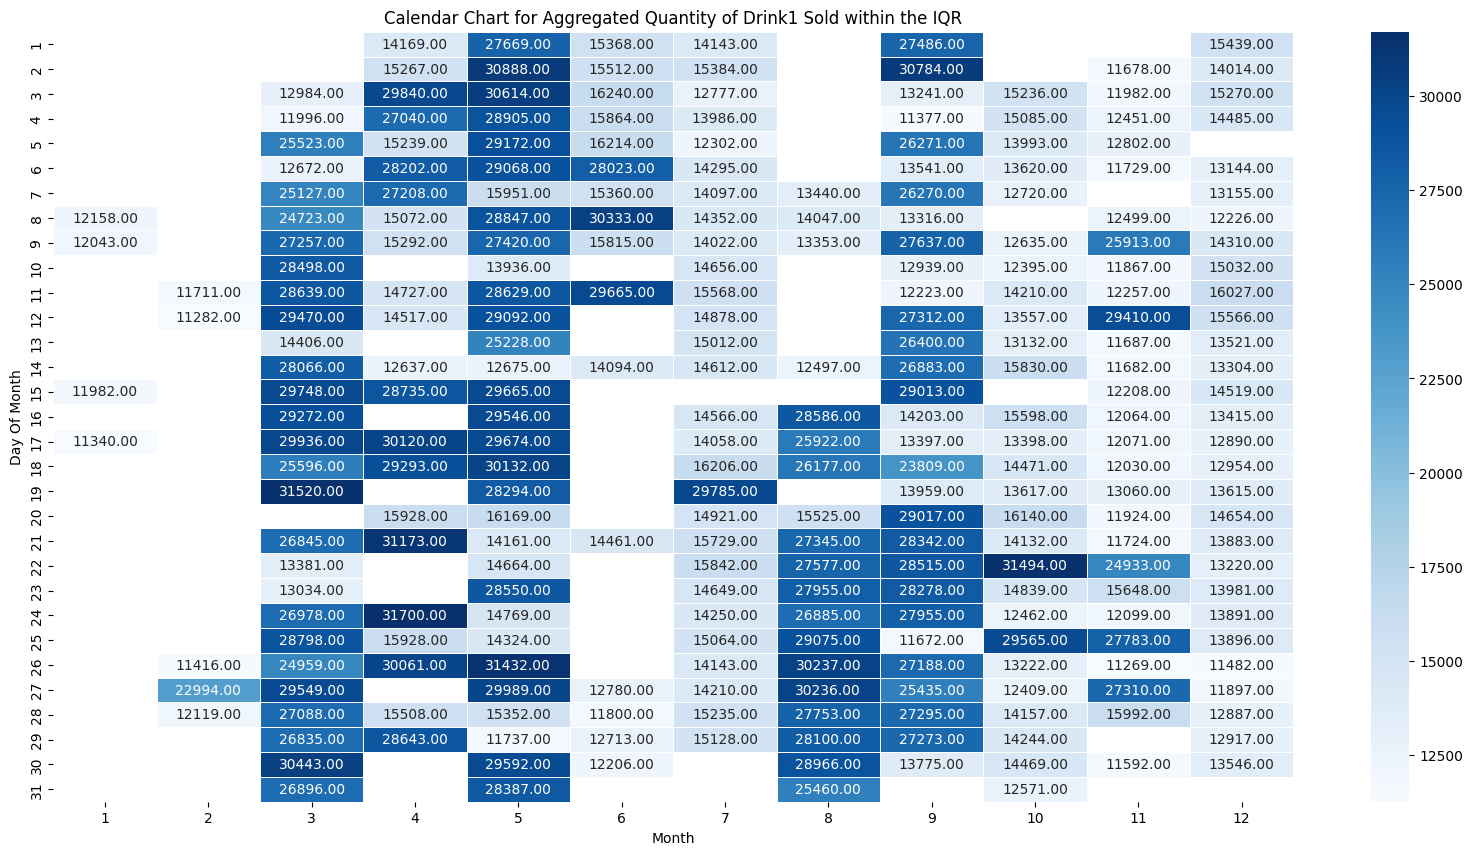

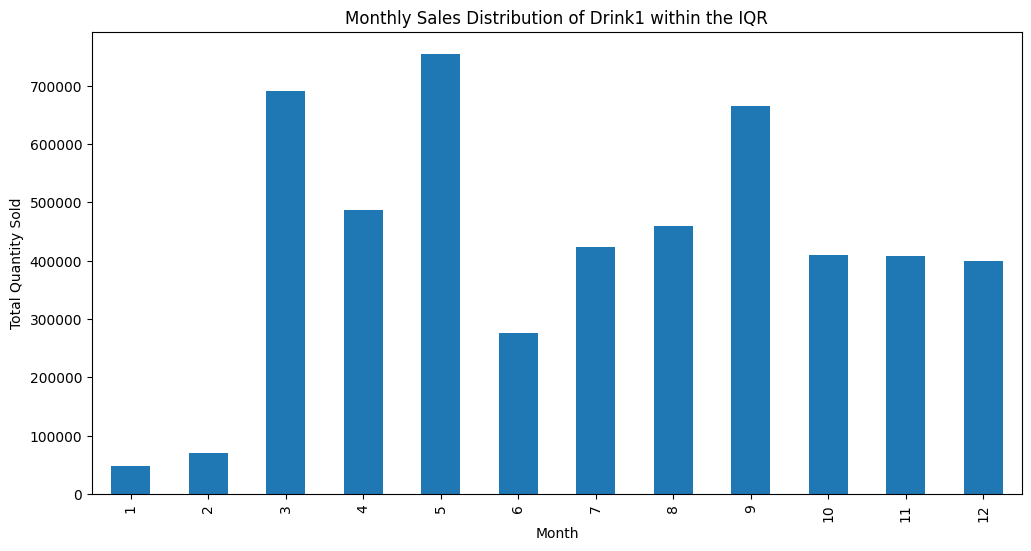

In [10]:
#plotting sales based on months for IQR

##Drink1
drink1_iqr["DATE"] = pd.to_datetime(drink1_iqr["DATE"])
drink1_iqr['Month'] = drink1_iqr['DATE'].dt.month
drink1_iqr["Day"] = drink1_iqr["DATE"].dt.day

peak_month_drink1_iqr = drink1_iqr.groupby('Month')['SUM(A.QUANTITY)'].sum()

peak_week_drink1_iqr = drink1_iqr.pivot_table(values="SUM(A.QUANTITY)", index=drink1_iqr["DATE"].dt.day, columns=drink1_iqr["DATE"].dt.month, aggfunc="sum")

#Plotting sales based on day and month of IQR Data
plt.figure(figsize=(20, 10))
sb.heatmap(peak_week_drink1_iqr, cmap="Blues", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Calendar Chart for Aggregated Quantity of Drink1 Sold within the IQR")
plt.xlabel("Month")
plt.ylabel("Day Of Month")
plt.show()

#Plotting sales based on months of IQR Data
plt.figure(figsize=(12, 6))
peak_month_drink1_iqr.plot(kind='bar')
plt.title('Monthly Sales Distribution of Drink1 within the IQR')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

**Findings:**

For Drink1:
- Peak Month: May
- Peak Day: 4/24

For Drink2 (from previous calendar chart of normalized sales):
- Peak Month: July
- Peak Day: 7/30

Let's decide the week for Drink1 to base our prediction model for. 

Since the peak day of sales is not in the peak month of sales for both the drinks, let's select the week within the *peak month* of the sales.

For Drink1: 5/2~5/8

For Drink2 (from previous calendar chart of normalized sales): 7/25~7/31

In [11]:
#Defining peak season

##Drink1
drink1_iqr["DATE"] = pd.to_datetime(drink1_iqr["DATE"])

spring_drink1 = drink1_iqr[drink1_iqr["Month"].between(3, 5)]
spring_grouped_drink1 = spring_drink1.groupby("Month")["SUM(A.QUANTITY)"].sum().reset_index()
spring_sum_drink1 = sum(spring_grouped_drink1["SUM(A.QUANTITY)"])
spring_median_drink1 = spring_grouped_drink1["SUM(A.QUANTITY)"].median()

summer_drink1 = drink1_iqr[drink1_iqr["Month"].between(6, 8)]
summer_grouped_drink1 = summer_drink1.groupby("Month")["SUM(A.QUANTITY)"].sum().reset_index()
summer_sum_drink1 = sum(summer_grouped_drink1["SUM(A.QUANTITY)"])
summer_median_drink1 = summer_grouped_drink1["SUM(A.QUANTITY)"].median()

fall_drink1 = drink1_iqr[drink1_iqr["Month"].between(9, 11)]
fall_grouped_drink1 = fall_drink1.groupby("Month")["SUM(A.QUANTITY)"].sum().reset_index()
fall_sum_drink1 = sum(fall_grouped_drink1["SUM(A.QUANTITY)"])
fall_median_drink1 = fall_grouped_drink1["SUM(A.QUANTITY)"].median()

winter_drink1 = drink1_iqr[drink1_iqr["Month"].isin([12, 1, 2])]
winter_grouped_drink1 = winter_drink1.groupby("Month")["SUM(A.QUANTITY)"].sum().reset_index()
winter_sum_drink1 = sum(winter_grouped_drink1["SUM(A.QUANTITY)"])
winter_median_drink1 = winter_grouped_drink1["SUM(A.QUANTITY)"].median()

seasons_drink1= {
    "Spring": spring_sum_drink1,
    "Summer": summer_sum_drink1,
    "Fall": fall_sum_drink1,
    "Winter": winter_sum_drink1,
}
print(seasons_drink1)
print("\nHighest sales for Drink1:", max(seasons_drink1.items(), key=lambda x: x[1]))

seasons_median_drink1 = {
    "Spring": spring_median_drink1,
    "Summer": summer_median_drink1,
    "Fall": fall_median_drink1,
    "Winter": winter_median_drink1,
}
print("\n",seasons_median_drink1)
print("\nHighest median of sales for Drink1:",max(seasons_median_drink1.items(), key=lambda x: x[1]))


##Drink2
drink2_grouped["DATE"] = pd.to_datetime(drink2_grouped["DATE"])

spring_drink2 = drink2_grouped[drink2_grouped["Month"].between(3, 5)]
spring_grouped_drink2 = spring_drink2.groupby("Month")["SUM(A.QUANTITY)"].sum().reset_index()
spring_sum_drink2 = sum(spring_grouped_drink2["SUM(A.QUANTITY)"])
spring_median_drink2 = spring_grouped_drink2["SUM(A.QUANTITY)"].median()

summer_drink2 = drink2_grouped[drink2_grouped["Month"].between(6, 8)]
summer_grouped_drink2 = summer_drink2.groupby("Month")["SUM(A.QUANTITY)"].sum().reset_index()
summer_sum_drink2 = sum(summer_grouped_drink2["SUM(A.QUANTITY)"])
summer_median_drink2 = summer_grouped_drink2["SUM(A.QUANTITY)"].median()

fall_drink2 = drink2_grouped[drink2_grouped["Month"].between(9, 11)]
fall_grouped_drink2 = fall_drink2.groupby("Month")["SUM(A.QUANTITY)"].sum().reset_index()
fall_sum_drink2 = sum(fall_grouped_drink2["SUM(A.QUANTITY)"])
fall_median_drink2 = fall_grouped_drink2["SUM(A.QUANTITY)"].median()

winter_drink2 = drink2_grouped[drink2_grouped["Month"].isin([12, 1, 2])]
winter_grouped_drink2 = winter_drink2.groupby("Month")["SUM(A.QUANTITY)"].sum().reset_index()
winter_sum_drink2 = sum(winter_grouped_drink2["SUM(A.QUANTITY)"])
winter_median_drink2 = winter_grouped_drink2["SUM(A.QUANTITY)"].median()

seasons_drink2= {
    "Spring": spring_sum_drink2,
    "Summer": summer_sum_drink2,
    "Fall": fall_sum_drink2,
    "Winter": winter_sum_drink2,
}
print("\n",seasons_drink2)
print("\nHighest sales for Drink2:", max(seasons_drink2.items(), key=lambda x: x[1]))

seasons_median_drink2 = {
    "Spring": spring_median_drink2,
    "Summer": summer_median_drink2,
    "Fall": fall_median_drink2,
    "Winter": winter_median_drink2,
}
print("\n",seasons_median_drink2)
print("\nHighest median of sales for Drink2:", max(seasons_median_drink2.items(), key=lambda x: x[1]))

{'Spring': 1931069.0, 'Summer': 1159454.0, 'Fall': 1481671.0, 'Winter': 516185.0}

Highest sales for Drink1: ('Spring', 1931069.0)

 {'Spring': 690239.0, 'Summer': 423870.0, 'Fall': 409201.0, 'Winter': 69522.0}

Highest median of sales for Drink1: ('Spring', 690239.0)

 {'Spring': 44502052.0, 'Summer': 88432965.0, 'Fall': 47732409.0, 'Winter': 27529323.0}

Highest sales for Drink2: ('Summer', 88432965.0)

 {'Spring': 14358042.0, 'Summer': 30989139.0, 'Fall': 17323274.0, 'Winter': 9015976.0}

Highest median of sales for Drink2: ('Summer', 30989139.0)


C:\Users\riya.singh\AppData\Local\Temp\ipykernel_27544\30159305.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drink1_iqr["DATE"] = pd.to_datetime(drink1_iqr["DATE"])


**Data Definition:**

Spring: March~May

Summer: June~August

Fall: September~November

Winter: December~February

**Findings:**

For Drink1:
- Highest sales: Spring
- Highest median: Spring

For Drink2:
- Highest sales: Summer
- Highest median: Summer

Now that we've done quite a lot of analysis on the data for both drinks throughout all years, lets focus into prediction modelling.

The first step to do is to seperate the datasets into the respective 3 years - 2021, 2022, 2023

In [12]:
#Splitting data according to year 2021, 2022, 2023

##Drink1
drink1_2021 = drink1_iqr[drink1_iqr["DATE"].dt.year==2021][["DATE", "SUM(A.QUANTITY)"]].sort_values("DATE").groupby("DATE")["SUM(A.QUANTITY)"].sum().reset_index()
drink1_2021["Week"] = drink1_2021["DATE"].dt.isocalendar().week
drink1_2021_weeks = drink1_2021.groupby("Week")["SUM(A.QUANTITY)"].sum().reset_index()
drink1_2021_weeks["Year"] = 2021
drink1_2021_weeks["Timeline"] = drink1_2021_weeks["Year"].astype(str) + drink1_2021_weeks["Week"].astype(str)
drink1_2021_weeks = drink1_2021_weeks.drop(columns=["Year","Week"])

drink1_2022 = drink1_iqr[drink1_iqr["DATE"].dt.year==2022][["DATE", "SUM(A.QUANTITY)"]].sort_values("DATE").groupby("DATE")["SUM(A.QUANTITY)"].sum().reset_index()
drink1_2022["Week"] = drink1_2022["DATE"].dt.isocalendar().week
drink1_2022_weeks = drink1_2022.groupby("Week")["SUM(A.QUANTITY)"].sum().reset_index()
drink1_2022_weeks["Year"] = 2022
drink1_2022_weeks["Timeline"] = drink1_2022_weeks["Year"].astype(str) + drink1_2022_weeks["Week"].astype(str)
drink1_2022_weeks = drink1_2022_weeks.drop(columns=["Year","Week"])


drink1_2023 = drink1_iqr[drink1_iqr["DATE"].dt.year==2023][["DATE", "SUM(A.QUANTITY)"]].sort_values("DATE").groupby("DATE")["SUM(A.QUANTITY)"].sum().reset_index()
drink1_2023["Week"] = drink1_2023["DATE"].dt.isocalendar().week
drink1_2023_weeks = drink1_2023.groupby("Week")["SUM(A.QUANTITY)"].sum().reset_index()
drink1_2023_weeks["Year"] = 2023
drink1_2023_weeks["Timeline"] = drink1_2023_weeks["Year"].astype(str) + drink1_2023_weeks["Week"].astype(str)
drink1_2023_weeks = drink1_2023_weeks.drop(columns=["Year","Week"])


##Drink2
drink2_2021 = drink2_grouped[drink2_grouped["DATE"].dt.year==2021][["DATE", "SUM(A.QUANTITY)"]].sort_values("DATE").groupby("DATE")["SUM(A.QUANTITY)"].sum().reset_index()
drink2_2021["Week"] = drink2_2021["DATE"].dt.isocalendar().week
drink2_2021_weeks = drink2_2021.groupby("Week")["SUM(A.QUANTITY)"].sum().reset_index()
drink2_2021_weeks["Year"] = 2021
drink2_2021_weeks["Timeline"] = drink2_2021_weeks["Year"].astype(str) + drink2_2021_weeks["Week"].astype(str)
drink2_2021_weeks = drink2_2021_weeks.drop(columns=["Year","Week"])

drink2_2022 = drink2_grouped[drink2_grouped["DATE"].dt.year==2022][["DATE", "SUM(A.QUANTITY)"]].sort_values("DATE").groupby("DATE")["SUM(A.QUANTITY)"].sum().reset_index()
drink2_2022["Week"] = drink2_2022["DATE"].dt.isocalendar().week
drink2_2022_weeks = drink2_2022.groupby("Week")["SUM(A.QUANTITY)"].sum().reset_index()
drink2_2022_weeks["Year"] = 2022
drink2_2022_weeks["Timeline"] = drink2_2022_weeks["Year"].astype(str) + drink2_2022_weeks["Week"].astype(str)
drink2_2022_weeks = drink2_2022_weeks.drop(columns=["Year","Week"])


drink2_2023 = drink2_grouped[drink2_grouped["DATE"].dt.year==2023][["DATE", "SUM(A.QUANTITY)"]].sort_values("DATE").groupby("DATE")["SUM(A.QUANTITY)"].sum().reset_index()
drink2_2023["Week"] = drink2_2023["DATE"].dt.isocalendar().week
drink2_2023.loc[drink2_2023["Week"] == 52, "Week"] = 1
drink2_2023_weeks = drink2_2023.groupby("Week")["SUM(A.QUANTITY)"].sum().reset_index()
drink2_2023_weeks["Year"] = 2023
drink2_2023_weeks["Timeline"] = drink2_2023_weeks["Year"].astype(str) + drink2_2023_weeks["Week"].astype(str)
drink2_2023_weeks = drink2_2023_weeks.drop(columns=["Year","Week"])


#Concatenate the weekly dataframes for Drink1
drink1_weeks = pd.concat([drink1_2021_weeks, drink1_2022_weeks, drink1_2023_weeks])
drink1_weeks = drink1_weeks.rename({'SUM(A.QUANTITY)': 'Sales'}, axis=1)
drink1_weeks = drink1_weeks.reset_index()
drink1_weeks = drink1_weeks.drop(columns=["index"])


#Concatenate the weekly dataframes for Drink2
drink2_weeks = pd.concat([drink2_2021_weeks, drink2_2022_weeks, drink2_2023_weeks])
drink2_weeks = drink2_weeks.rename({'SUM(A.QUANTITY)': 'Sales'}, axis=1)
drink2_weeks = drink2_weeks.reset_index()
drink2_weeks = drink2_weeks.drop(columns=["index"])

We divided the dataset based on years and also included a 'Timeline' column to all these datasets that has information on what year and what week the respective sales occured in. We concatenated the datasets for these 3 years into one single dataframe for respective drinks.

Let's look at the data distribution of the sales throughout these 3 years.

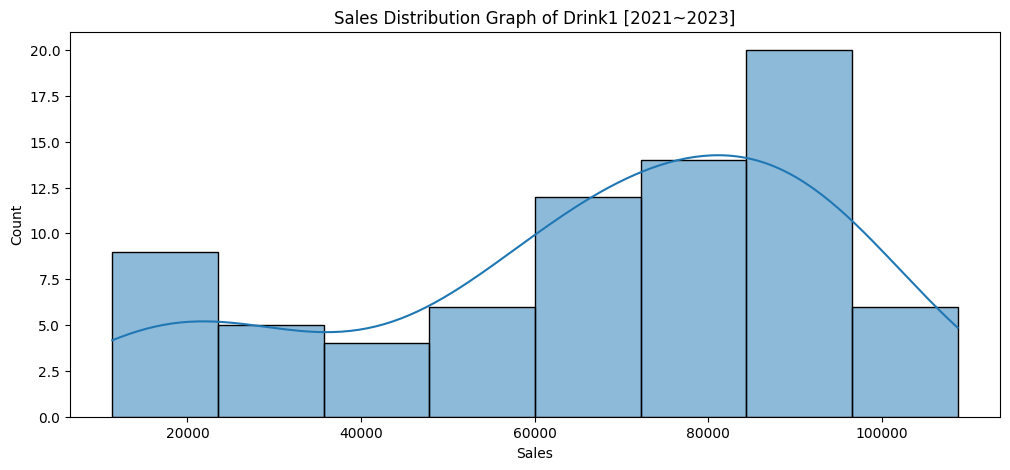

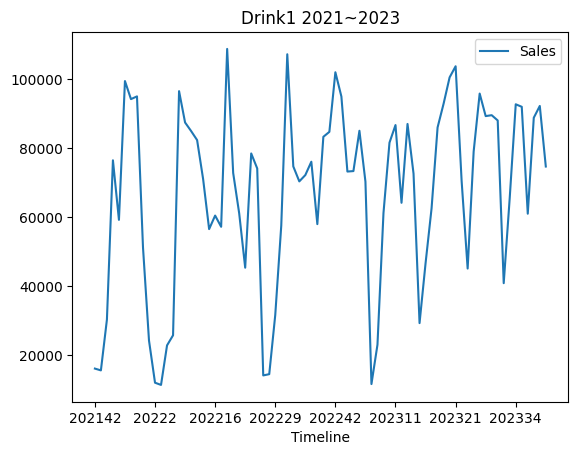

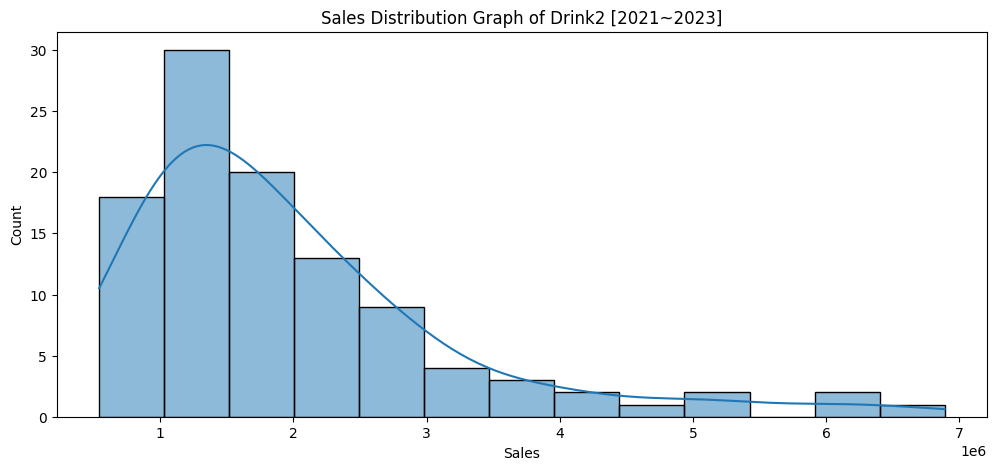

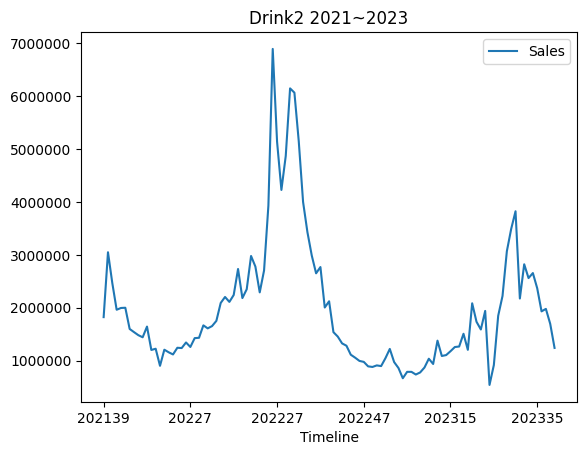

In [13]:
plt.figure(figsize=(12,5))
plt.title("Sales Distribution Graph of Drink1 [2021~2023]")
drink1_distribution = sb.histplot(drink1_weeks["Sales"], kde=True) 
plt.ticklabel_format(axis='x', style='plain')

drink1_weeks.plot(x="Timeline", y="Sales")
plt.title("Drink1 2021~2023")
plt.show()

plt.figure(figsize=(12,5))
plt.title("Sales Distribution Graph of Drink2 [2021~2023]")
drink2_distribution = sb.histplot(drink2_weeks["Sales"], kde=True)

drink2_weeks.plot(x="Timeline", y="Sales")
plt.title("Drink2 2021~2023")
plt.ticklabel_format(axis='y', style='plain')
plt.show()

We can see from the distribution graph above for Drink1 that the distribution is again, not normal. A trend we can notice is that whenever there is a peak in sales, there is a downfall in sales right before it. This implies when the sales rise or become really high, there is a period where these sales are low.

As for Drink2, we can see a huge peak in sales during the 27th week of 2022 and the 35th week of 2022. We can make a general assumption that these peak sales are normally around the 30th week of a year. 

Let's now proceed with conducting some statistical tests to see if our data for these two drinks throughout the last 3 years is stationary or not.

If p<0.05, the data is stationary.

If p>0.05, the data is not stationary.

In [ ]:
def stats_test(dataset):
    
    test = adfuller(dataset, autolag = 'AIC')
    
    print("1. ADF : ",test[0])
    print("2. P-Value : ", test[1])
    print("3. Num Of Lags : ", test[2])
    print("4. Num Of Observations Used For ADF Regression:",test[3])
    print("5. Critical Values :")
    for key, val in test[4].items():
         print("\t",key, ": ", val)
         
         
print("For Drink1:")
stats_test(drink1_weeks['Sales'])
print("\n For Drink2:")
stats_test(drink2_weeks['Sales'])

For Drink1:
1. ADF :  -5.466196414655833
2. P-Value :  2.455769628486003e-06
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression: 74
5. Critical Values :
	 1% :  -3.5219803175527606
	 5% :  -2.9014701097664504
	 10% :  -2.58807215485756

 For Drink2:
1. ADF :  -2.376057742308107
2. P-Value :  0.14860826185352505
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 104
5. Critical Values :
	 1% :  -3.4948504603223145
	 5% :  -2.889758398668639
	 10% :  -2.5818220155325444


We can see that the p-value for Drink1 is below 0.05. Hence, we can conclude that our data for Drink1 is stationary. 

However, the p-value for Drink2 is >0.05, indicating that the data is not stationary. 

Now, let's proceed with finding the best fit order for our ARIMA model. 

We do this by messing around with the parameters of the auto_arima() function that basically spits out the best fit order based on an 'AIC score'. The order that has the lowest AIC score is declared to be the best fit order. 

Since our data for Drink2 is not stationary, we make it stationary by assigning our d value for the auto_arima() function as 1.

In [23]:
print("For Drink1:")
stepwise_fit = auto_arima(drink1_weeks['Sales'], trace=True, suppress_warnings=True)

print("\n For Drink2:")
stepwise_fit = auto_arima(drink2_weeks['Sales'], trace=True, suppress_warnings=True, d=1)

For Drink1:
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1745.139, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1770.180, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1743.890, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1745.312, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1918.052, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1741.192, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1742.426, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1744.000, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1742.582, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1744.286, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1760.716, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.475 seconds

 For Drink2:
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3056.213, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0

After messing around with the seasonal and m parameters of the function, we find that the auto_arima() function keeps giving us (2,0,0) for Drink1 and (0,1,0) for Drink2 as the best fit for the orders.

Let's proceed with fitting these orders for our ARIMA model. We also find the RMSE (Root Mean Squared Error) value to validate our output model. Basically, the lower the RMSE value is, the better the model is.

predicted=79775.415349, expected=72607.000000
predicted=64276.821057, expected=29264.000000
predicted=36199.816245, expected=46608.000000
predicted=59237.257826, expected=62554.000000
predicted=66226.383232, expected=86006.000000
predicted=79080.426995, expected=92890.000000
predicted=78369.811318, expected=100523.000000
predicted=82951.812453, expected=103747.000000
predicted=84419.395426, expected=70448.000000
predicted=58655.465912, expected=45085.000000
predicted=48282.956180, expected=79026.000000
predicted=79873.254338, expected=95831.000000
predicted=83631.145515, expected=89292.000000
predicted=74545.250700, expected=89557.000000
predicted=76978.567455, expected=88030.000000
predicted=76109.474657, expected=40840.000000
predicted=41273.731945, expected=65599.000000
predicted=71709.488431, expected=92718.000000
predicted=85165.163363, expected=91992.000000
predicted=77736.656000, expected=60990.000000
predicted=55427.109938, expected=88819.000000
predicted=83434.786058, expected

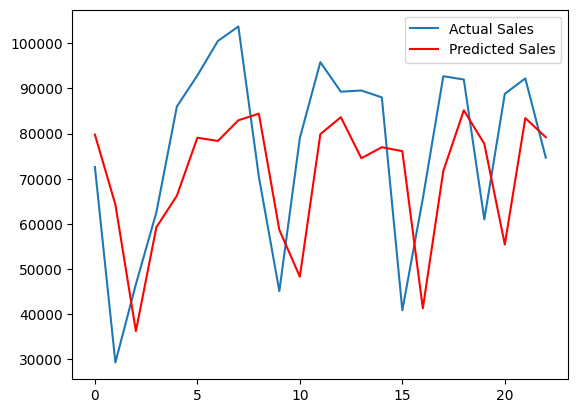

In [28]:
X = drink1_weeks.iloc[:, 0].values
train, test = X[:int(len(X) * 0.7)], X[int(len(X) * 0.7):]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(2,0,0))  
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print("Test RMSE:", rmse)

plt.plot(test, label="Actual Sales")
plt.plot(predictions, color='red', label="Predicted Sales")  #x axis = len test, predictions
plt.legend()
plt.show()

We can see from the graph above that everytime there is a peak in sales, there is a downfall in sales right before it.

We can see that our RMSE is ridiculously high (19423.72117802509). This indicated that the prediction model didn't work too well on the actual sales data. 

Let's do the same for Drink2.

predicted=738553.000000, expected=777780.000000
predicted=777780.000000, expected=870933.000000
predicted=870933.000000, expected=1036901.000000
predicted=1036901.000000, expected=937734.000000
predicted=937734.000000, expected=1378359.000000
predicted=1378359.000000, expected=1088786.000000
predicted=1088786.000000, expected=1105928.000000
predicted=1105928.000000, expected=1178623.000000
predicted=1178623.000000, expected=1257790.000000
predicted=1257790.000000, expected=1267729.000000
predicted=1267729.000000, expected=1508371.000000
predicted=1508371.000000, expected=1204609.000000
predicted=1204609.000000, expected=2083950.000000
predicted=2083950.000000, expected=1735269.000000
predicted=1735269.000000, expected=1589600.000000
predicted=1589600.000000, expected=1940126.000000
predicted=1940126.000000, expected=542083.000000
predicted=542083.000000, expected=917894.000000
predicted=917894.000000, expected=1847940.000000
predicted=1847940.000000, expected=2222927.000000
predicted=2

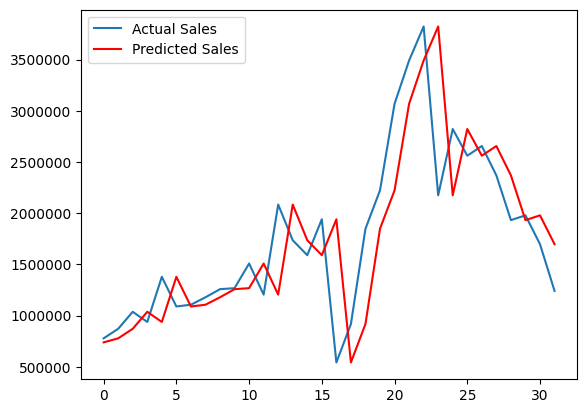

In [24]:
X = drink2_weeks.iloc[:, 0].values
train, test = X[:int(len(X) * 0.7)], X[int(len(X) * 0.7):]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))  
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print("Test RMSE: %.3f" % rmse)

plt.plot(test, label="Actual Sales")
plt.plot(predictions, color='red', label="Predicted Sales")  #x axis = len test, predictions
plt.ticklabel_format(axis='y', style='plain')
plt.legend()
plt.show()

We can see from how our expected values and original sales look like now.

An interesting trend we see here is that before the huge peak in sales (between 15~21), there is a slight bit of downfall.

We can see that our RMSE is ridiculously high (542145.581) for Drink2 as well. This again, indicated that the prediction model didn't work too well on the actual sales data. 

We can see that ARIMA model isn't the best fit for prediction modelling due to high RMSE values. This could be due to the assumptions that ARIMA has - stationarity, linearity, independence.

### Summarized Conclusion:
Based on all three years' data combined, we can make the following conclusions:

- the distribution for Drink1 sales is somewhat normal, but since outliers exist, we proceed with using the IQR dataset; and the data is stationary
- the distribution for Drink2 sales is lognormal; and the data isn't stationary
- there is an overall correlation of 0.64 and a 0.89 correlation in October between both drinks
- Drink1 sold the most in spring, especially in the month of May.
- Drink2 sold the most in summer, especially in the month of July.
- the ARIMA model isn't the best fit for our data. Since the RMSE values are really high, we cannot entirely rely on ARIMA for our prediction.
- we also see, that as a trend, there is a downfall in sales everytime there is a huge peak in sales for both drinks but occures much more for Drink1.